In [142]:
import pandas as pd
import math
from scipy import stats
import matplotlib.pyplot as plt

In [143]:
data = pd.read_csv('Hurricane.csv')

In [144]:
print(data.head())

                           Name  Season               Month  \
0                  Hurricane #3    1853   August, September   
1  "1856 Last Island Hurricane"    1856              August   
2                  Hurricane #6    1866  September, October   
3                  Hurricane #7    1878  September, October   
4                  Hurricane #2    1880              August   

   Max. sustained winds(mph)  Minimum pressure(mbar)  
0                        150                     924  
1                        150                     934  
2                        140                     938  
3                        140                     938  
4                        150                     931  


In [145]:
data.columns = ['Name', 'Season', 'Month', 'mph', 'mbar']

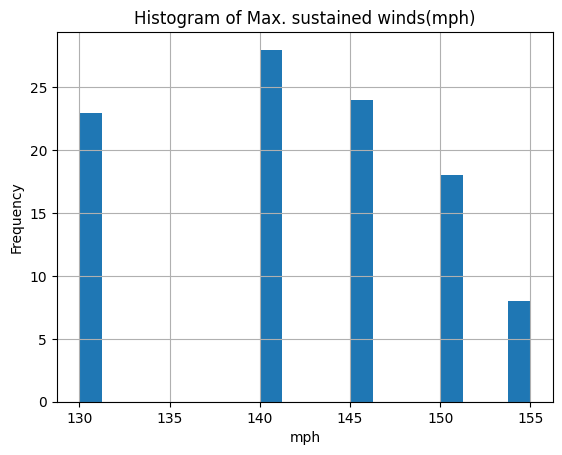

In [146]:
data['mph'].hist(bins=20)
plt.xlabel('mph')
plt.ylabel('Frequency')
plt.title('Histogram of Max. sustained winds(mph)')
plt.show()

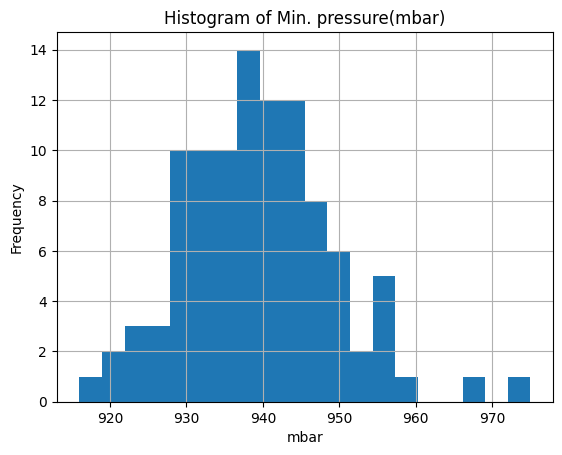

In [147]:
data['mbar'].hist(bins=20)
plt.xlabel('mbar')
plt.ylabel('Frequency')
plt.title('Histogram of Min. pressure(mbar)')
plt.show()

### (a) With a 1% level of significance conduct t-test for correlation coefficient between “Max. sustained winds(mph)” and “Minimum pressure(mbar)”.

In [148]:
# Calculating mean
mean_mph = data['mph'].mean()
mean_mbar = data['mbar'].mean()

print(f"Mean of Max Sustained Winds: {mean_mph}")
print(f"Mean of Minimum Pressure: {mean_mbar}")

# Calculating covariance
covariance = data[['mph', 'mbar']].cov().iloc[0, 1]

print(f"Covariance: {covariance}")

# Calculating standard deviation
std_dev_mph = data['mph'].std()
std_dev_mbar = data['mbar'].std()

print(f"Standard Deviation of Max Sustained Winds: {std_dev_mph}")
print(f"Standard Deviation of Minimum Pressure: {std_dev_mbar}")

# Calculating correlation
correlation = data[['mph', 'mbar']].corr().iloc[0, 1]

print(f"Correlation: {correlation}")

# t-test
n = len(data)
t = correlation * math.sqrt(n - 2) / math.sqrt(1 - correlation ** 2)

print(f"t-test: {t}")

# range: mean - t * std_dev, mean + t * std_dev
t_value = stats.t.ppf(0.995, n-2)

print(f"t-value: {t_value}")

if abs(t) > t_value:
    print("Reject the null hypothesis; there is a significant correlation between Max Sustained Winds and Minimum Pressure")
else:
    print("Accept the null hypothesis; there is no significant correlation between Max Sustained Winds and Minimum Pressure")

# p-value
p = 2 * (1 - stats.t.cdf(abs(t), df=n-2))

print("Degree of Freedom:", n-2)

print(f"p-value: {p}")

# Conclusion
if p < 0.01:
    print("Reject the null hypothesis; there is a significant correlation between Max Sustained Winds and Minimum Pressure")
else:
    print("Accept the null hypothesis; there is no significant correlation between Max Sustained Winds and Minimum Pressure")

Mean of Max Sustained Winds: 141.88118811881188
Mean of Minimum Pressure: 939.3762376237623
Covariance: -37.714851485148536
Standard Deviation of Max Sustained Winds: 7.837457660125342
Standard Deviation of Minimum Pressure: 9.950730109040759
Correlation: -0.4835954956356632
t-test: -5.4972701573448
t-value: 2.6264054572808275
Reject the null hypothesis; there is a significant correlation between Max Sustained Winds and Minimum Pressure
Degree of Freedom: 99
p-value: 3.009918618790408e-07
Reject the null hypothesis; there is a significant correlation between Max Sustained Winds and Minimum Pressure


### (b) With a 5% level of significance test if the “Max. sustained winds(mph)” of hurricane depends on the month of its occurrence.

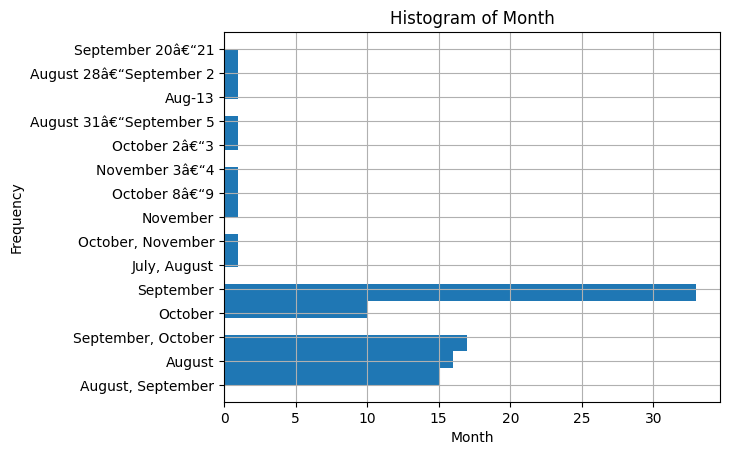

In [149]:
data['Month'].hist(bins=20, orientation='horizontal')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Histogram of Month')
plt.show()

<Axes: xlabel='Month'>

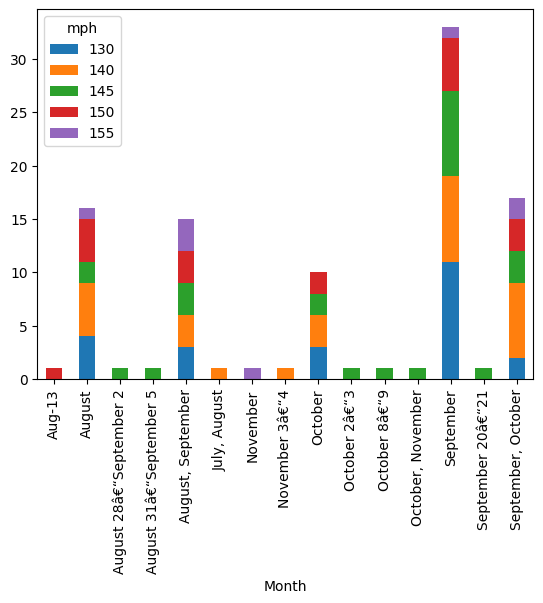

In [150]:
contingency_table = pd.crosstab(data['Month'], data['mph'])
contingency_table.plot(kind='bar', stacked=True)

In [151]:
month_total = contingency_table.sum(axis=1)
mph_total = contingency_table.sum(axis=0)
contingency_total = contingency_table.values.sum()

print("month_total:", month_total)
print("mph_total:", mph_total)
print("contingency_total:", contingency_total)

month_total: Month
Aug-13                      1
August                     16
August 28â€“September 2     1
August 31â€“September 5     1
August, September          15
July, August                1
November                    1
November 3â€“4              1
October                    10
October 2â€“3               1
October 8â€“9               1
October, November           1
September                  33
September 20â€“21           1
September, October         17
dtype: int64
mph_total: mph
130    23
140    28
145    24
150    18
155     8
dtype: int64
contingency_total: 101


In [152]:
expected_frequency = pd.DataFrame(index=contingency_table.index, columns=contingency_table.columns)

for i in contingency_table.index:
    for j in contingency_table.columns:
        expected_frequency.at[i, j] = (month_total[i] * mph_total[j]) / contingency_total

print("Expected Frequency:")
print(expected_frequency)

Expected Frequency:
mph                           130       140       145       150       155
Month                                                                    
Aug-13                   0.227723  0.277228  0.237624  0.178218  0.079208
August                   3.643564  4.435644   3.80198  2.851485  1.267327
August 28â€“September 2  0.227723  0.277228  0.237624  0.178218  0.079208
August 31â€“September 5  0.227723  0.277228  0.237624  0.178218  0.079208
August, September        3.415842  4.158416  3.564356  2.673267  1.188119
July, August             0.227723  0.277228  0.237624  0.178218  0.079208
November                 0.227723  0.277228  0.237624  0.178218  0.079208
November 3â€“4           0.227723  0.277228  0.237624  0.178218  0.079208
October                  2.277228  2.772277  2.376238  1.782178  0.792079
October 2â€“3            0.227723  0.277228  0.237624  0.178218  0.079208
October 8â€“9            0.227723  0.277228  0.237624  0.178218  0.079208
October, November 

In [153]:
# Chi-square test
chi_square = 0

for i in contingency_table.index:
    for j in contingency_table.columns:
        observed = contingency_table.at[i, j]
        expected = expected_frequency.at[i, j]
        chi_square += (observed - expected) ** 2 / expected

print(f"Chi-square: {chi_square}")

Chi-square: 52.06381257734756


In [154]:
rows, cols = contingency_table.shape
df = (rows - 1) * (cols - 1)

print(f"Degrees of Freedom: {df}")

Degrees of Freedom: 56


In [155]:
chi_square_critical = stats.chi2.ppf(0.95, df)

print(f"Chi-square Critical: {chi_square_critical}")

if chi_square > chi_square_critical:
    print("Reject the null hypothesis; there is a significant relationship between Month and Max Sustained Winds")
else:
    print("Accept the null hypothesis; there is no significant relationship between Month and Max Sustained Winds")

Chi-square Critical: 74.46832415930936
Accept the null hypothesis; there is no significant relationship between Month and Max Sustained Winds


In [156]:
# p-value
p = 1 - stats.chi2.cdf(chi_square, df=df)

print(f"p-value: {p}")

# Conclusion
if p < 0.05:
    print("Reject the null hypothesis; there is a significant association between Month and Max Sustained Winds")
else:
    print("Accept the null hypothesis; there is no significant association between Month and Max Sustained Winds")

p-value: 0.624606475287109
Accept the null hypothesis; there is no significant association between Month and Max Sustained Winds


### With a 10% level of significance conduct test if “Max. sustained winds(mph)” follows a Poisson distribution.

In [157]:
scaling_factor = 4

# scaling mph
data['mph'] = data['mph'] // scaling_factor

In [158]:
# how many times each wind occurred
mph_count = data['mph'].value_counts()

print("mph_count:")
print(mph_count)

mph_count:
mph
35    28
36    24
32    23
37    18
38     8
Name: count, dtype: int64


In [159]:
mean_mph_scaled = data['mph'].mean()

In [164]:
# expected frequencies using Poisson distribution
expected_frequency = {}
n = len(data)

# print("Total Observations:", n)

for i in mph_count.index:
    poisson_prob = (mean_mph_scaled ** i) * math.exp(-mean_mph_scaled) / math.factorial(i)
    expected_frequency[i] = poisson_prob * n * scaling_factor

print("Expected Frequency:")
print(expected_frequency)

Expected Frequency:
{35: 67.92457861754696, 36: 66.31800167554775, 32: 61.42807648246177, 37: 62.99943964361639, 38: 58.2720194723393}


In [165]:
chi_square = 0

for i in mph_count.index:
    observed = mph_count[i]
    expected = expected_frequency[i]
    chi_square += (observed - expected) ** 2 / expected

print(f"Chi-square: {chi_square}")

Chi-square: 150.0226515678308


In [166]:
df = len(mph_count) - 2

print(f"Degrees of Freedom: {df}")

Degrees of Freedom: 3


In [167]:
chi_square_critical = stats.chi2.ppf(0.90, df)

print(f"Chi-square Critical: {chi_square_critical}")

if chi_square > chi_square_critical:
    print("Reject the null hypothesis; the distribution of Max Sustained Winds is not Poisson")
else:
    print("Accept the null hypothesis; the distribution of Max Sustained Winds is Poisson")

Chi-square Critical: 6.251388631170325
Reject the null hypothesis; the distribution of Max Sustained Winds is not Poisson
